In [22]:
import numpy as np
import random
import matplotlib.pyplot as plt

In [23]:
#Chloe Smith (1877342)
#Matthew Kruger (1669326)
#Philani Mpofu (1848751)
#Jesse Bristow (1875955)

[0.84313301 0.58299063 0.0213537 ]


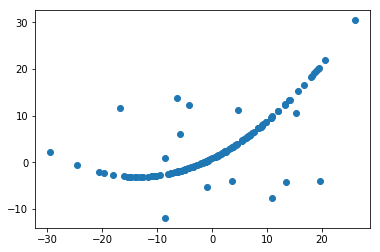

In [24]:
#sample 150 x-values from normal dist. with mean of 0, std dev of 10
x = np.random.normal(0, 10, 150)

#construct design matrix
X = np.empty((150, 3))

for i in range(150):
    X[i][0] = 1
    X[i][1] = x[i]
    X[i][2] = x[i]**2
    
#sample values for theta0, theta1, theta2 from uniform dist. between 0 and 1
theta = np.random.uniform(0, 1, 3)

#create y-values from x-values and theta values
y = np.empty(150)
for i in range(150):
    y[i] = theta[0] + (theta[1] * X[i][1]) + (theta[2] * X[i][2])
    
#insert 10% noise into y-values
for i in range(15):
    index = random.randint(0, 149)
    y[index] = np.random.normal(0, 8, 1)
    
#plot x- and y-values in scatter plot
plt.plot(x, y, 'o')

#print true theta values for comparison
print(theta)

In [25]:
#split data into training, validation and test datasets
#80% training data, 10% validation, 10% testing
trainingX = x[:120]
trainingY = y[:120]
validX = x[120:135]
validY = y[120:135]
testX = x[135:150]
testY = y[135:150]

[[ 7.18560325e-02  7.51274276e-02  4.45998962e-02  7.21404350e-02
  -5.22009104e-01  4.52864327e-04  7.54506148e-02  7.17223412e-02
   7.45586225e-02 -7.56143548e-03  6.40921642e-02 -4.11404861e-03
  -2.03587907e-02 -2.10052234e-02 -1.93795079e-02 -1.72987935e-02
  -2.47627263e-02  4.64924954e-02 -2.43057835e-02  4.25259547e-03
  -1.29121604e-01 -2.48252598e-02 -2.27734468e-02  6.61584087e-02
   4.00344984e-02 -2.43514353e-02 -9.63683894e-03  5.40157395e-02
   5.23615354e-03 -1.85536577e-02  7.52944882e-02  6.91845783e-02
   1.14128396e-02  4.58727021e-03 -2.30851412e-02  1.63910562e-02
  -2.01334885e-02 -6.07800006e-04  7.21089534e-02 -7.78679995e-02
   6.21772526e-02  4.08892807e-03  7.54402441e-02  1.54711114e-01
   2.33212141e-03 -1.33056736e-02 -2.70939058e-02  7.17322757e-02
   7.37942615e-02 -2.18682005e-02 -2.17356791e-02  2.77316300e-02
  -2.11419519e-02  1.50908137e-01 -1.15119357e-02 -2.33359178e-02
   7.53588566e-02 -7.84839651e-03 -2.40704213e-02 -4.72097644e-02
   1.49267

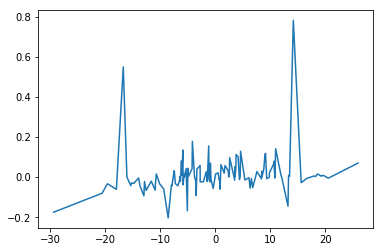

In [26]:
#find theta solution from training data
tX = X[:120]
thetaSolution = np.multiply(np.linalg.pinv(tX), trainingY)
print(thetaSolution)

#plot graph given by solution
xSorted = np.sort(trainingX, axis=None)
ySolution = thetaSolution[0] + (thetaSolution[1] * xSorted) + (thetaSolution[2] * xSorted**2)
plt.plot(xSorted, ySolution)

The learned parameter values are quite far from the true values, but generate a reasonably similar curve to the true curve.

In [27]:
#compute training error for model
trainingError = 0

def solutionY(x, theta0, theta1, theta2):
    size = len(x)
    y = np.empty(size)
    
    for i in range(size):
        y[i] = theta0 + (theta1 * x[i]) + (theta2 * (x[i]**2))
        
    return y

solY = solutionY(trainingX, theta[0], theta[1], theta[2])

for i in range(120):
    trainingError += (trainingY[i] - solY[i])**2
    
trainingError = trainingError*0.5
print(trainingError)

1031.0394794711233


Training error from this model is very high.

In [28]:
#compute validation error for model
validationError = 0

solY = solutionY(validX, theta[0], theta[1], theta[2])

for i in range(15):
    validationError += (validY[i] - solY[i])**2
    
validationError = validationError*0.5
print(validationError)

39.99428703453057


Validation error from this model is also high.

In [29]:
#using Gradient Descent instead to train model
#choose initial theta corresponding to y = x + x**2
theta = np.array([0,1,1])

#choose learning rate and tolerance for convergence
tolerance = 0.05
alpha = 0.2

#check that max difference between theta[i] values <= tolerance
diff = np.empty(3)


count = 0
while True:
    #get solution for y from current theta
    solution = solutionY(trainingX, theta[0], theta[1], theta[2])
    
    #calculate new theta
    thetaTemp = np.empty(3)
    errorTerm = (trainingY[count] - solution[count])**2
    #gradient descent is done here
    #theta = theta - alpha*J(theta)
    #      = theta - alpha*errorTerm*i-th row of design matrix
    thetaTemp = theta - alpha*np.multiply(errorTerm, tX[count])
    
    #compute difference vector
    for i in range(3):
        diff[i] = (theta[i] - thetaTemp[i])
    
    #update theta to thetaTemp and increment count variable
    theta = thetaTemp
    count += 1
    #if maximum difference is less than tolerance value
    #    or reached end of data points, break
    if (np.amax(diff) <= tolerance) or (count >= len(trainingX)):
        break
        
print(theta)

[nan nan nan]


D:\Programs\anaconda3\lib\site-packages\ipykernel_launcher.py:20: RuntimeWarning: overflow encountered in double_scalars
D:\Programs\anaconda3\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in double_scalars
  if __name__ == '__main__':
